In [84]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from sklearn import preprocessing
with open('../res/Staphylococcus_aureus/stats_with_alignment.json') as json_file:
    stats = json.load(json_file)
with open('../res/Staphylococcus_aureus/blast_genes_sum.json') as json_file:
    blast_stats = json.load(json_file)
    
genome_length = 2900155
average_read_length = 180
num_of_reads = 1294104
original_cov = float(num_of_reads*average_read_length)/genome_length

[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'N-50 to cov box-plot')]

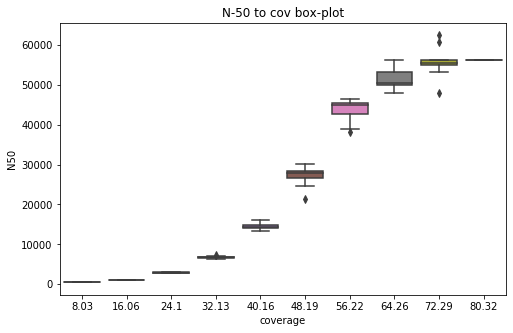

In [85]:
cov = sorted(stats.keys())
cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
# N50_contigs = list(map(lambda x:np.mean([n["Contig Stats"]["N50"] for n in stats[x]]), cov))

# scaffolds
plt.figure(figsize=(8, 5))

sns.boxplot(cov_fragmented,N50_scaffolds).set(title= "N-50 to cov box-plot",ylabel="N50",xlabel = "coverage")
# plt.savefig(os.path.join(directory,"N50_scaff.png"))
#contigs
# plt.plot(cov, N50_contigs)
# plt.xlabel("coverage")
# plt.ylabel("N50 avg")
# plt.title("N50 per cov")
# plt.savefig(os.path.join(directory,"N50_contig.png"))

In [86]:
norm_N50 = preprocessing.normalize(N50_scaffolds)

[Text(0, 0.5, 'normlized N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

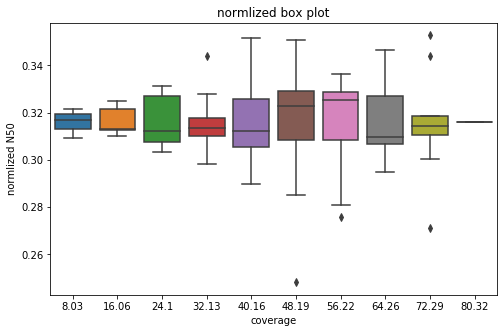

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(cov_fragmented,list(norm_N50)).set(xlabel="coverage", ylabel="normlized N50",title="normlized box plot")



[Text(0, 0.5, 'normlized similarity'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

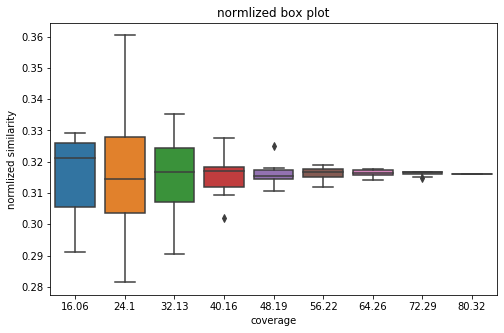

In [88]:
alined_precentage =list( map(lambda x:([n["Gene Alignment"]["total_alined_percentage"] for n in stats[x]]), cov[1:]))
flatten_aligned = [item for sublist in alined_precentage for item in sublist]
flatten_N50 = [item for sublist in N50_scaffolds[1:] for item in sublist]



plt.figure(figsize=(8, 5))
norm_similarity = preprocessing.normalize(alined_precentage)
sns.boxplot(cov_fragmented[1:],list(norm_similarity)).set(xlabel="coverage", ylabel="normlized similarity",title="normlized box plot")




[Text(0, 0.5, 'similarity precentage'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'similarity to cov box-plot')]

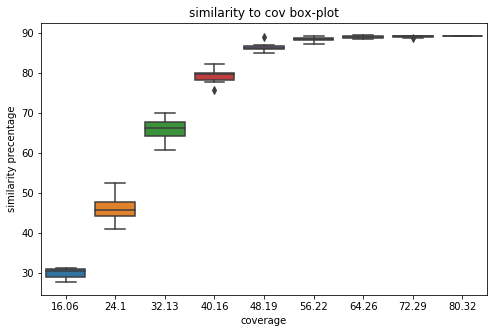

In [89]:
plt.figure(figsize=(8, 5))

sns.boxplot(cov_fragmented[1:],alined_precentage).set(title= "similarity to cov box-plot",ylabel="similarity precentage",xlabel = "coverage")

[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'similarity precentage'),
 Text(0.5, 1.0, 'aligned precentage to N50')]

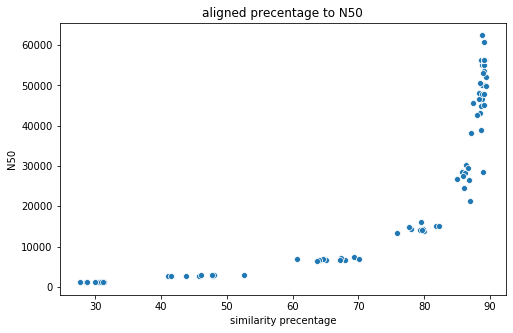

In [90]:
# scatter plot of N50 to total_alined_percentage

plt.figure(figsize=(8, 5))
sns.scatterplot(flatten_aligned,flatten_N50).set(title = "aligned precentage to N50",xlabel="similarity precentage", ylabel="N50")

In [91]:
# pearson correlation between aligned precentage to N50
scipy.stats.pearsonr(flatten_aligned,flatten_N50)

(0.8246372218973932, 1.7178030445233286e-23)

In [116]:
#blast stats
# cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
# N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
cov_b = sorted(blast_stats.keys())
cov_fragmented_b = [round(float(x)*original_cov,2) for x in cov_b]
temp = list(map(lambda x:[blast_stats[x][e] for e in blast_stats[x].keys()],cov_b))
temp2 = list(map(lambda cov:[[(exp[gene]["subject_length"],float(exp[gene]["align_length"])/float(exp[gene]["subject_length"])) for gene in exp.keys()] for exp in cov],temp))

#blast_stats["0.1"]["10"].keys()

cov_list = []
for cov in temp2:
    gene_list = []
    flag = True
    for i,exp in enumerate(cov):
        count = 0
        for length,align_precentage in exp:
            if flag:
                gene_list.append((length,align_precentage))
            else:
                gene_list[count] =(gene_list[count][0],gene_list[count][1] + align_precentage)
            count += 1
        flag = False
    
    cov_list.append(gene_list)


In [117]:
list(map(list, zip(*cov_list[0])))

per_cov_x =[]
per_cov_y =[]
for cov in cov_list:
    x_axis,y_axis = list(map(list, zip(*cov)))
    per_cov_x.append(x_axis)
    per_cov_y.append(y_axis)


[Text(0, 0.5, 'alignment precentage'),
 Text(0.5, 0, 'gene length'),
 Text(0.5, 1.0, 'gene length over precent of alignment')]

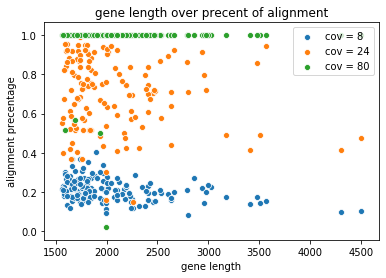

In [155]:
val_x = np.array([float(x) for x in per_cov_x[0]])
val_y = np.array([float(x) for x in per_cov_y[0]])
low_val_x = val_x[val_x < 5000]
low_val_y = val_y[val_x < 5000]/9



sns.scatterplot(low_val_x,low_val_y,label="cov = 8").set(title="gene length over precent of alignment", xlabel= "gene length", ylabel = "alignment precentage")

val_x = np.array([float(x) for x in per_cov_x[3]])
val_y = np.array([float(x) for x in per_cov_y[3]])
low_val_x = val_x[val_x < 5000]
low_val_y = val_y[val_x < 5000]/10


sns.scatterplot(low_val_x,low_val_y,label="cov = 24").set(title="gene length over precent of alignment", xlabel= "gene length", ylabel = "alignment precentage")

val_x = np.array([float(x) for x in per_cov_x[9]])
val_y = np.array([float(x) for x in per_cov_y[9]])
low_val_x = val_x[val_x < 5000]
low_val_y = val_y[val_x < 5000]/10


sns.scatterplot(low_val_x,low_val_y,label="cov = 80").set(title="gene length over precent of alignment", xlabel= "gene length", ylabel = "alignment precentage")


[Text(0, 0.5, 'alignment precentage'),
 Text(0.5, 0, 'gene length'),
 Text(0.5, 1.0, 'gene length over precent of alignment for coverage = 24')]

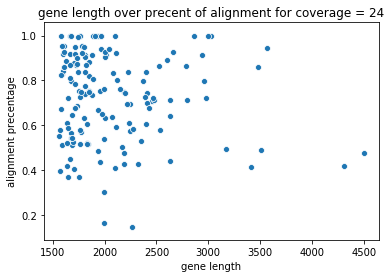

In [125]:
val_x = np.array([float(x) for x in per_cov_x[3]])
val_y = np.array([float(x) for x in per_cov_y[3]])
import itertools
low_val_x = val_x[val_x < 5000]
low_val_y = val_y[val_x < 5000]/10

sns.scatterplot(low_val_x,low_val_y).set(title="gene length over precent of alignment for coverage = 24", xlabel= "gene length", ylabel = "alignment precentage")

[Text(0, 0.5, 'alignment precentage'),
 Text(0.5, 0, 'gene length'),
 Text(0.5, 1.0, 'gene length over precent of alignment for coverage = 80')]

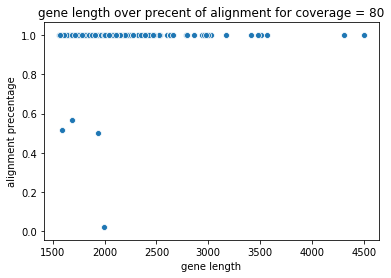

In [126]:
val_x = np.array([float(x) for x in per_cov_x[9]])
val_y = np.array([float(x) for x in per_cov_y[9]])
low_val_x = val_x[val_x < 5000]
low_val_y = val_y[val_x < 5000]/10

sns.scatterplot(low_val_x,low_val_y).set(title="gene length over precent of alignment for coverage = 80", xlabel= "gene length", ylabel = "alignment precentage")